In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso ,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV ,ElasticNetCV

In [2]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
Lasso_model=Lasso().fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [8]:
Lasso_model

Lasso()

In [9]:
Lasso_model.intercept_

-5.587450677336733

In [10]:
Lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [11]:
#farklı lambda degerlerine karsılık katsayılar

In [21]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,1000,10)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14584.828351464123, tolerance: 3898.686956380658
  positive)
C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7175814.3886974715, tolerance: 3898.686956380658
  positive)


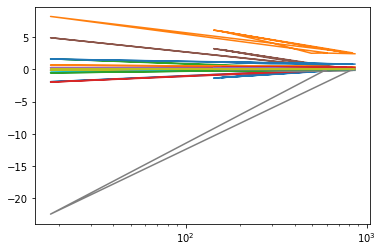

In [22]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

# Tahmin

In [26]:
Lasso_model.predict(X_train)[0:5]  # egitim setindeki bagımsız degiskenleri kullanarak egitim setindeki bagımlı degiskeni tahmin et

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [28]:
Lasso_model.predict(X_test)[0:5]  # test setindeki bagımsız degiskenleri kullanarak test setindeki bagımlı degiskeni tahmin et

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [29]:
y_pred=Lasso_model.predict(X_test)

In [30]:
# test hatasını hesapıyoruz (ilkel(optimize edilememiş) test hatası)

In [31]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554033

In [33]:
r2_score(y_test,y_pred)

0.4142279813236619

# Model Tuning

In [34]:
alphas=10**np.linspace(10,-2,100)*0.5

In [35]:
lasso_cv_model=LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(X_train,y_train)

In [36]:
lasso_cv_model.alpha_

201.85086292982749

In [37]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [38]:
y_pred=lasso_tuned.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037446

# ELASTİCNET REGRESYON

In [41]:
enet_model=ElasticNet().fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


# Tahmin

In [42]:
enet_model.predict(X_train)[0:5]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566])

In [43]:
enet_model.predict(X_test)[0:5]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393])

In [49]:
y_pred=enet_model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred)) # ilkel est hatamız

357.1676548181244

# Model Tuning

In [54]:
enet_Cv_model=ElasticNetCV(cv=10).fit(X_train,y_train)

In [55]:
enet_Cv_model.alpha_

5230.7647364798695

In [56]:
enet_Cv_model.intercept_  #sabit deger

-38.5194055839429

In [57]:
enet_Cv_model.coef_   #katsayılar

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [58]:
# final model

In [59]:
enet_tuned=ElasticNet(alpha=enet_Cv_model.alpha_).fit(X_train,y_train)

In [60]:
y_pred=enet_tuned.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795